In [2]:
try:
  import google.colab
  print("Setting Up Colab notebook")
  !pip install tensorflow==2.16.1 pennylane matplotlib -q
  print("Installed Packages")
  import os 
  if(not os.path.exists("../QML-Tutorials")):
    !git clone -b course https://github.com/MPSLab-ASU/QML-Tutorials.git
    %cd QML-Tutorials
  print("Fetched Data")
except ImportError:
  print("Not running in Google Colab")

Not running in Google Colab


In [3]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from utils.two_qubit import decompose_and_plot, draw_and_get_state
%matplotlib inline

# Quantum Teleportation - Code

In [4]:
def state_preparation(state):
    qml.StatePrep(state, wires=["S"])

In [5]:
def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

In [6]:
def basis_rotation():
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")

In [7]:
def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")

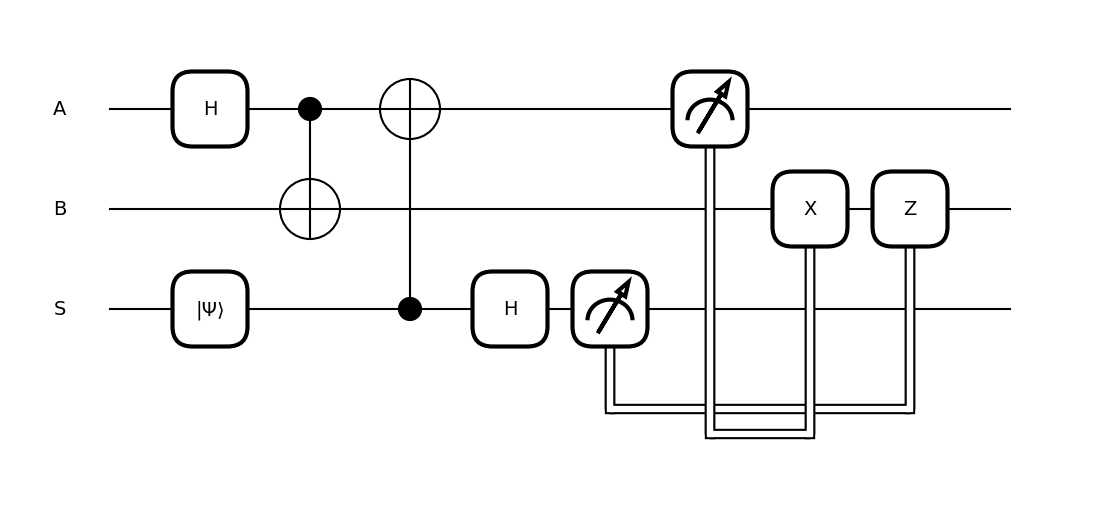

In [14]:
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()


state = np.array([1 / np.sqrt(2) + 0.3j, 0.4 - 0.5j])
_ = qml.draw_mpl(teleport)(state)
plt.show()

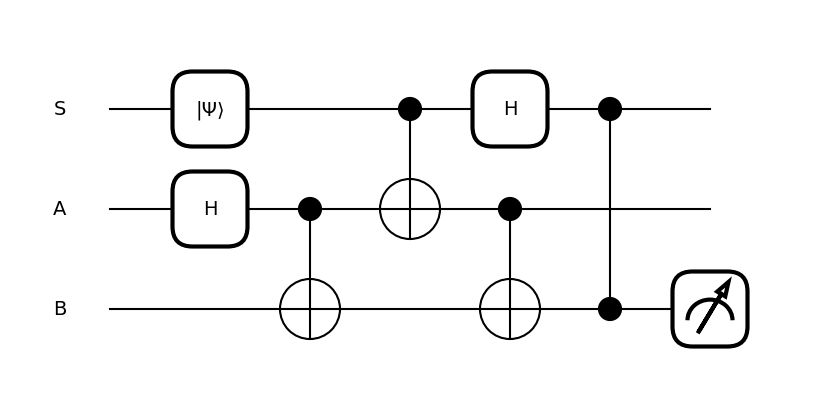

In [16]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])
@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix(wires=["B"])


_ = qml.draw_mpl(teleport, level="device")(state)
plt.show()